## Import Libraries

In [1]:
import sys, os
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt 
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file_handler import FileHandler
from plotter import Plotter
file_handler = FileHandler()
plot = Plotter()

2022-07-06 22:37:56,896 — FileHandler — DEBUG — Loaded successfully!
2022-07-06 22:37:56,901 — Plotter — DEBUG — Loaded successfully!


## Dataset Analysis

In [3]:
# Read the dataset

data = file_handler.read_csv('../data/Amharic_News_Dataset.csv')

2022-07-06 22:37:59,437 — FileHandler — DEBUG — File is read as csv


In [4]:
data.head()

,headline,category,date,views,article,link
0,የኦሊምፒክ ማጣሪያ ተሳታፊዎች የሚለዩበት ቻምፒዮና እየተካሄደ ይገኛል,ስፖርት,"January 14, 2021",2,ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻ...,https://www.press.et/Ama/?p=39481
1,አዲስ ዘመን ድሮ,መዝናኛ,"December 28, 2020",4,የአዲስ ዘመን ጋዜጣ ቀደምት ዘገባዎች በእጅጉ ተነባቢ ዛሬም ላገኛቸው በ...,https://www.press.et/Ama/?p=38334
2,የአረንጓዴ ጎርፍ በጎ አድራጎት አምባሳደሮች ተሰየሙ,ስፖርት,"January 6, 2021",6,ቦጋለ አበበየአዲስ አበባ ከተማ አስተዳደር ስፖርት ኮሚሽን ከኢትዮጵያ አረ...,https://www.press.et/Ama/?p=39010
3,የሊጉ በቢዝነስ ሞዴል መመራት አበረታች ጅምር መሆኑ ተገለጸ,ስፖርት,"January 6, 2021",5,ብርሃን ፈይሳአዲስ አበባ፡- የኢትዮጵያ ፕሪምየር ሊግ በሼር ካምፓኒ እንዲ...,https://www.press.et/Ama/?p=39011
4,የኦሊምፒክ ሥራ አስፈፃሚው እስከ ቶኪዮ ኦሊምፒክ ማግስት ይቀጥላል,ስፖርት,"January 6, 2021",12,ቦጋለ አበበ የኢትዮጵያ ኦሊምፒክ ኮሚቴ አርባ አምስተኛ መደበኛ ጠቅላላ ጉ...,https://www.press.et/Ama/?p=39012


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51483 entries, 0 to 51482
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  51470 non-null  object
 1   category  51482 non-null  object
 2   date      51483 non-null  object
 3   views     51483 non-null  object
 4   article   51483 non-null  object
 5   link      51483 non-null  object
dtypes: object(6)
memory usage: 2.4+ MB


In [6]:
data = data.dropna(subset=['article'])

In [7]:
data['word_len'] = data['article'].str.split().str.len()
data.head()

,headline,category,date,views,article,link,word_len
0,የኦሊምፒክ ማጣሪያ ተሳታፊዎች የሚለዩበት ቻምፒዮና እየተካሄደ ይገኛል,ስፖርት,"January 14, 2021",2,ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻ...,https://www.press.et/Ama/?p=39481,298
1,አዲስ ዘመን ድሮ,መዝናኛ,"December 28, 2020",4,የአዲስ ዘመን ጋዜጣ ቀደምት ዘገባዎች በእጅጉ ተነባቢ ዛሬም ላገኛቸው በ...,https://www.press.et/Ama/?p=38334,475
2,የአረንጓዴ ጎርፍ በጎ አድራጎት አምባሳደሮች ተሰየሙ,ስፖርት,"January 6, 2021",6,ቦጋለ አበበየአዲስ አበባ ከተማ አስተዳደር ስፖርት ኮሚሽን ከኢትዮጵያ አረ...,https://www.press.et/Ama/?p=39010,265
3,የሊጉ በቢዝነስ ሞዴል መመራት አበረታች ጅምር መሆኑ ተገለጸ,ስፖርት,"January 6, 2021",5,ብርሃን ፈይሳአዲስ አበባ፡- የኢትዮጵያ ፕሪምየር ሊግ በሼር ካምፓኒ እንዲ...,https://www.press.et/Ama/?p=39011,296
4,የኦሊምፒክ ሥራ አስፈፃሚው እስከ ቶኪዮ ኦሊምፒክ ማግስት ይቀጥላል,ስፖርት,"January 6, 2021",12,ቦጋለ አበበ የኢትዮጵያ ኦሊምፒክ ኮሚቴ አርባ አምስተኛ መደበኛ ጠቅላላ ጉ...,https://www.press.et/Ama/?p=39012,476


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51483 entries, 0 to 51482
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  51470 non-null  object
 1   category  51482 non-null  object
 2   date      51483 non-null  object
 3   views     51483 non-null  object
 4   article   51483 non-null  object
 5   link      51483 non-null  object
 6   word_len  51483 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 2.7+ MB


In [9]:
data.word_len.mean()

248.9586853912942

In [10]:
data['article'][0]

'ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻምፒዮና በአዲስ አበባ ከተማ በመካሄድ ላይ ይገኛል። የተሻለ ብቃት ያሳዩ ቦክሰኞች ለቶኪዮ ኦሊምፒክ ማጣሪያ ተሳታፊ እንደሚሆኑም ታውቋል።በቦክስ ስፖርት ከሚካሄዱት ዓመታዊ ቻምፒዮናዎች መካከል አንዱ በክለቦች መካከል የሚካሄደው ነው፤ የዚህ ውድድር የመጀመሪያው ዙር በአዲስ አበባ ከተማ ተጀምሯል። የኢትዮጵያ ቦክስ ፌዴሬሽን ከአዲስ አበባ ቦክስ ፌዴሬሽን ጋር በመተባበር በተዘጋጀው በዚህ ቻምፒዮና፤ ከኮቪድ 19 ወረርሽኝ መከሰት በኋላ ለመጀመሪያ ጊዜ የተካሄደ ውድድርም ነው። በውድድሩም ላይ አምስት ክለቦች ከአዲስ አበባ (ፌዴራልፖሊስ፣ ፌዴራል ማረሚያ ቤቶች፣ አዲስ አበባ ፖሊስ፣ የኢትዮጵያ ወጣቶች ስፖርት አካዳሚ እና ኦሞቲክ ቦክስ)፣ ሁለት ክለቦች ከአማራ ክልል (ጎንደር ከነማ እና ደሴ ከነማ) እንዲሁም ድሬዳዋ ከነማ በድምሩ ስምንት ክለቦች ተሳታፊ መሆናቸውን የኢትዮጵያ ቦክስ ፌዴሬሽን መረጃ ያሳያል። በአጠቃላይ ክለቦቻቸውን ወክለውም 12 ሴትና 76 ወንድ ቦክሰኞች በጥቅሉ 88 ተወዳዳሪዎች ተሳታፊ ይሆናሉ። ውድድሩ የሚካሄደው በራስ ኃይሉ ስፖርት ትምህርትና ስልጠና ማዕከል ሲሆን፤ በ10 ክብደቶች በ49፣ 52፣ 57፣ 60፣ 63፣ 69፣ 70፣ 81፣ 89 እና 91 ኪሎ ግራሞች እየተካሄደም ይገኛል። የቦክስ ስፖርት ከንክኪ ስፖርቶች መካከል አንዱ እንደመሆኑ ጨዋታው በሚካሄድበት ወቅት ቦክሰኞቹ አካላዊ ቅርርብ ሊያደርጉ እና ሊነካኩ ይችላሉ። በመሆኑም በዚህ ረገድ ውድድሩ ሙሉ ለሙሉ የኮቪድ 19 ጥንቃቄን በተላበሰ መልኩ እየተካሄደ መሆኑን ነው ፌዴሬሽኑ ያረጋገጠው። ይኸውም ተወዳዳሪዎችና አሰልጣኞች የኮቪድ ምርመራ እንዲያደርጉና ከሌሎች ሰዎች ጋር እንዳይገናኙ በካምፕ እንዲቆዩ በማድረግ ነው። ከዚህ

## Dataset Preparation

In [11]:
combined = file_handler.article_category_partition(data, 0, len(data))

2022-07-06 22:38:05,017 — FileHandler — INFO — Article splitted and combined with its category successfully


In [12]:
combined

,category,text
0,ስፖርት,ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻ...
1,ስፖርት,የተሻለ ብቃት ያሳዩ ቦክሰኞች ለቶኪዮ ኦሊምፒክ ማጣሪያ ተሳታፊ እንደሚሆኑ...
2,ስፖርት,በአጠቃላይ ክለቦቻቸውን ወክለውም 12 ሴትና 76 ወንድ ቦክሰኞች በጥቅሉ ...
3,ስፖርት,ይኸውም ተወዳዳሪዎችና አሰልጣኞች የኮቪድ ምርመራ እንዲያደርጉና ከሌሎች ሰ...
4,ስፖርት,ኮቪድ 19 ዓለም አቀፍ ወረርሽኝ እንደመሆኑ በመላው ዓለም ስፖርታዊ ውድድ...
...,...,...
154787,ፖለቲካ,በውይይታቸውም የዓለም የምግብ ፕሮግራም ለኢትዮጵያ የሚያደርገውን ድጋፍ አ...
154788,ፖለቲካ,የጋምቤላ ክልል ፕሬስ ሴክሬታሪያት በላከልን መረጃ መሰረት
154789,ፖለቲካ,አቶ አገኘሁ ተሻገር የአማራ ክልል የሰላም ግንባታና የህዝብ ደህንነት ቢሮ...
154790,ሀገር አቀፍ ዜና,ዘ ሄግ ኢንስቲቱዩት ፎር ኢኖቬሽን ኦፍ ሎው


In [13]:
combined.category.unique()

array(['ስፖርት', 'መዝናኛ', 'ሀገር አቀፍ ዜና', 'ቢዝነስ', 'ዓለም አቀፍ ዜና', 'ፖለቲካ'],
      dtype=object)

In [14]:
combined['category'].value_counts().rename_axis('Text Category').to_frame('Count')

,Count
Text Category,
ሀገር አቀፍ ዜና,54860
ስፖርት,54797
መዝናኛ,17889
ዓለም አቀፍ ዜና,12781
ፖለቲካ,11508
ቢዝነስ,2957


Here we converted the Amharic category name to English to make it readable for any viewers.

In [20]:
plot_df = combined.copy()     
plot_df.loc[(plot_df['category'] == 'ስፖርት')] = 'Sport'
plot_df.loc[(plot_df['category'] == 'ፖለቲካ')] = 'Politics'
plot_df.loc[(plot_df['category'] == 'ሀገር አቀፍ ዜና')] = 'National News'
plot_df.loc[(plot_df['category'] == 'ዓለም አቀፍ ዜና')] = 'International News'
plot_df.loc[(plot_df['category'] == 'መዝናኛ')] = 'Entertainment'
plot_df.loc[(plot_df['category'] == 'ቢዝነስ')] = 'Business' 

In this section we ploted a bar graph which shows the distribution of the text category.

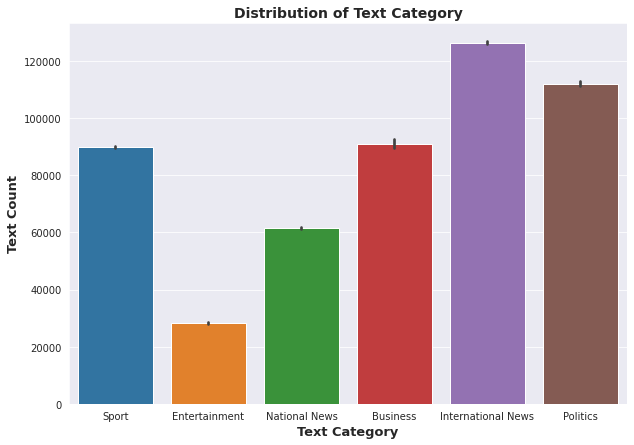

In [21]:
plot.plot_bar(plot_df['category'], "Distribution of Text Category", "Text Category", "Text Count")

## Save our final Dataset

In [19]:
file_handler.save_csv(combined, "../data/transcription_text.csv")

2022-07-06 22:39:35,868 — FileHandler — INFO — File saved as csv
